In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True)

In [3]:
x=np.array([290,329,342,359,369,386,395,410,425,427,433,437,445,450,458,462,469,478,484,489,495,496,502,509,511,514,516,518,521,523])
y=np.array([321,295,287,274,270,259,257,250,247,247,246,245,245,246,247,248,251,255,259,264,270,271,280,292,297,302,307,313,324,330])
y=np.array([640-a for a in y])

In [4]:
x = x.reshape(-1, 1)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_poly = poly.fit_transform(x)
# print(x_poly)

In [5]:
# plt.scatter(x, y)      # x 代表x轴 y 代表y轴数据, 数据维度必须相同
# plt.show()

In [6]:
ridgeCV = RidgeCV(alphas=[0.01, 0.1, 1.0, 10, 100, 1000, 10000, 100000, 1000000, 10000000], cv=10)

In [7]:
ridgeCV.fit(x_poly, y)

RidgeCV(alphas=[0.01, 0.1, 1.0, 10, 100, 1000, 10000, 100000, 1000000,
                10000000],
        cv=10)

In [8]:
print(ridgeCV.alpha_)

0.01


In [9]:
print(ridgeCV.coef_)
print(ridgeCV.intercept_)

[ 4.97878715 -0.00595639]
-644.7701251013968


In [10]:
print(ridgeCV.score(x_poly, y))

0.8808782975322723


In [11]:
y_hat = ridgeCV.predict(x_poly)

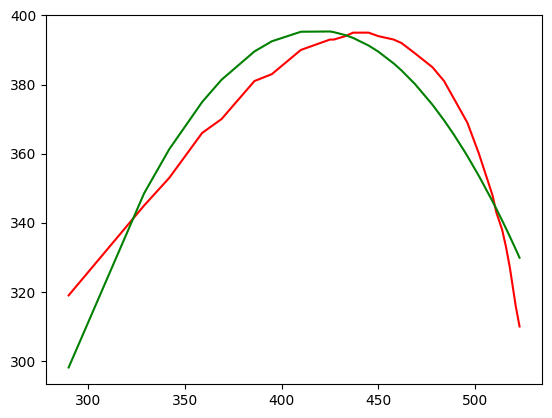

In [12]:
plt.plot(x, y, 'r', label=u'true')
plt.plot(x, y_hat, 'g', label=u'predict')
plt.show()